In [84]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
from dotenv import find_dotenv, load_dotenv
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
load_dotenv(find_dotenv())
# Load the raw data path from environment variable

project_dir = Path().resolve().parents[1]
raw_data_path = os.path.join(project_dir, os.getenv('RAWDATAPATH'))

os.listdir(raw_data_path)


['ptbdb_normal.csv',
 'mitbih_test.csv',
 'ptbdb_abnormal.csv',
 '.gitkeep',
 'mitbih_train.csv']

<Axes: xlabel='187', ylabel='Count'>

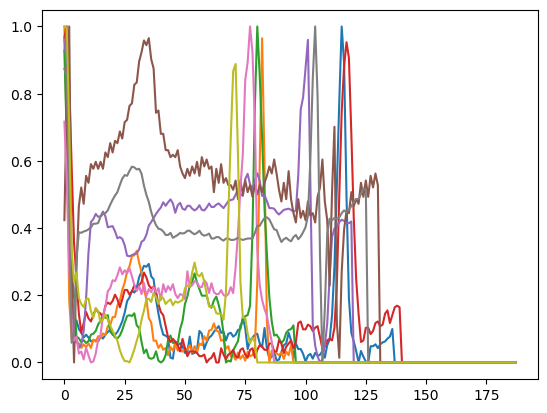

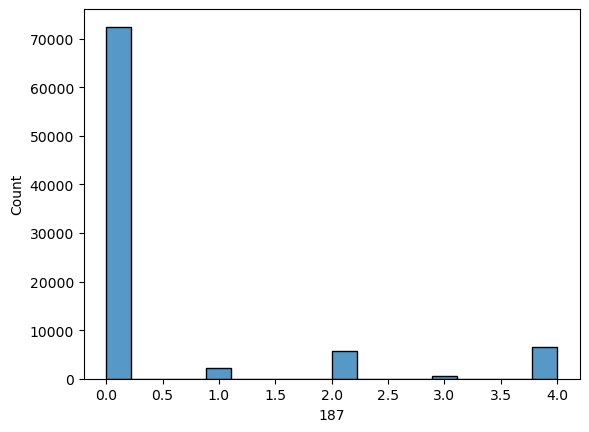

In [124]:
# Load MIT-BIH dataset
mitbih = pd.read_csv(f"{raw_data_path}/mitbih_train.csv",header=None)
mitbih_normal = mitbih[mitbih.iloc[:,-1] == 0]
plt.plot(mitbih_normal.iloc[1:10,:].T)
plt.figure()
sns.histplot(mitbih.iloc[:,-1]) # See the imbalance in the dataset (most of the heartbeats are normal, while very few are abnormal)



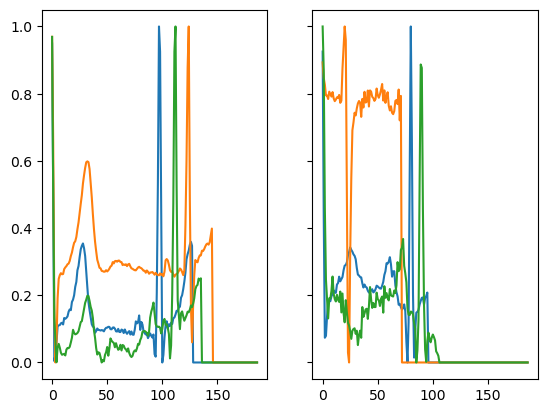

In [122]:
# Load PTB dataset
ptb_normal = pd.read_csv(f"{raw_data_path}/ptbdb_normal.csv",header=None)
ptb_abnormal = pd.read_csv(f"{raw_data_path}/ptbdb_abnormal.csv",header=None)

fig, ax = plt.subplots(1,2,sharex = True, sharey= True)
ax[0].plot(ptb_normal.iloc[5:20:5,:-1].T)
ax[1].plot(ptb_abnormal.iloc[5:20:5,:-1].T)



<Axes: xlabel='187', ylabel='Count'>

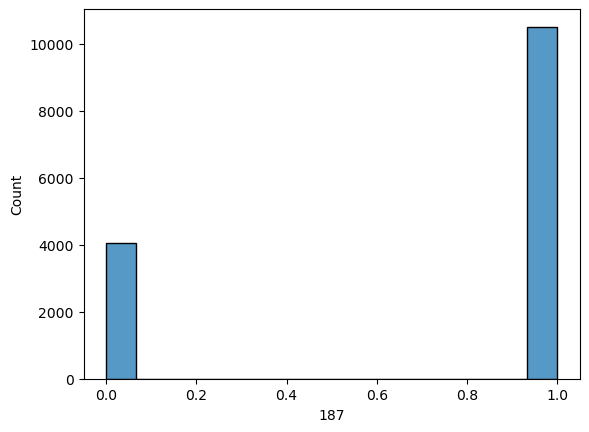

In [111]:
merged_ptb = pd.concat([ptb_normal, ptb_abnormal])
sns.histplot(merged_ptb.iloc[:,-1])  # Here we have more abnormal samples than normal ones. 

In [115]:
# Check if there are missing values 

if(mitbih.isnull().sum().sum()):
    print('missing value(s) found in mit-bih, clean the dataset...\n')
if(merged_ptb.isnull().sum().sum()):
    print('missing value(s) found in ptb dataset, clean the dataset...\n')